In [1]:
import math
import sys

import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
from playsound import playsound

from app.analyze import get_spectrogram

In [24]:
def get_f0(wave, sr):
    corr = np.correlate(wave, wave, "full")
    corr = corr[len(corr) // 2 :]

    def is_peak(corr, i):
        return 0 < i < len(corr) - 1 and corr[i - 1] < corr[i] < corr[i + 1]

    peakindices = [i for i in range(len(corr)) if is_peak(corr, i)]
    peakindices = [i for i in peakindices if i != 0]
    if len(peakindices) == 0:
        return 0
    maxidx = max(peakindices, key=lambda index: corr[index])
    return 1 / (maxidx / sr)

In [4]:
# サンプリングレート
SR = 16000

# 音声ファイルの読み込み
a, _ = librosa.load("data/a.wav", sr=SR)
aiueo, _ = librosa.load("data/aiueo.wav", sr=SR)
man, _ = librosa.load("data/shs-test-man.wav", sr=SR)
woman, _ = librosa.load("data/shs-test-woman.wav", sr=SR)
sinusoid, _ = librosa.load("data/sinusoid.wav", sr=SR)
print(a.shape)

print(get_f0(a, SR), get_f0(aiueo, SR), get_f0(man, SR), get_f0(woman, SR))

(19504,)
111.11111111111111 110.3448275862069 533.3333333333334 36.69724770642202


In [17]:
len(woman)

56000

(0, 350)

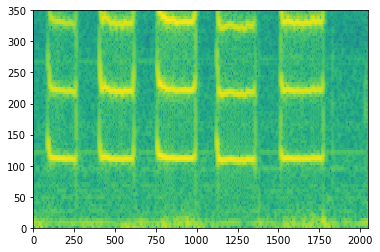

In [47]:
spec = get_spectrogram(aiueo, SR, 4096)
plt.imshow(
    np.flipud(spec.T),
    extent=[0, spec.shape[1], 0, SR / 2],
    aspect="auto",
    interpolation="nearest",
)
plt.ylim(0, 350)

In [40]:
step = 800
frame = 64000
wave = aiueo

f0s = []
for i in range(0, len(wave) - frame, step):
    f0s.append(get_f0(wave[i : i + step], SR))

f0s = np.array(f0s)
len(f0s)

215

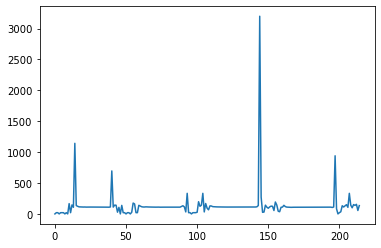

In [41]:
plt.plot(f0s)